### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#### Lendo os dados da base tratada de 2018 a 2024

In [46]:
df_accidents = pd.read_csv(
    "../../wrangling/datatran2018_2024_dados_tratados.csv",
    parse_dates=["data_inversa", "mes_ano"]
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_14499/630777532.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436643 entries, 0 to 436642
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      436643 non-null  float64       
 1   data_inversa            436643 non-null  datetime64[ns]
 2   tipo_data               436643 non-null  object        
 3   ano                     436643 non-null  int64         
 4   mes                     436643 non-null  object        
 5   mes_ano                 436643 non-null  datetime64[ns]
 6   dia_semana              436643 non-null  object        
 7   horario                 436643 non-null  object        
 8   fase_dia                436643 non-null  object        
 9   condicao_metereologica  436643 non-null  object        
 10  uf                      436643 non-null  object        
 11  municipio               436643 non-null  object        
 12  br                      436643

#### Criando função para desenhar gráfico de barras à partir de determinados parâmetros

In [ ]:
now = pd.Timestamp.now()


def generate_barplot(
        enable_lineplot,
        x_value,
        y_value,
        title,
        x_label=None,
        y_label=None,
        file_name=f'barplot_{pd.Timestamp.now().strftime("%Y%m%d%H%M%S")}'
):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=x_value, y=y_value)
    if enable_lineplot:
        sns.lineplot(x=x_value, y=y_value, marker="o",
                     color="red", linewidth=1)
        plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.xticks(rotation=45, ha="right")
    plt.margins(x=0)
    plt.savefig(f"../../{file_name}.png")
    plt.show()

#### Análise da distribuição dos acidentes à partir da data_inversa

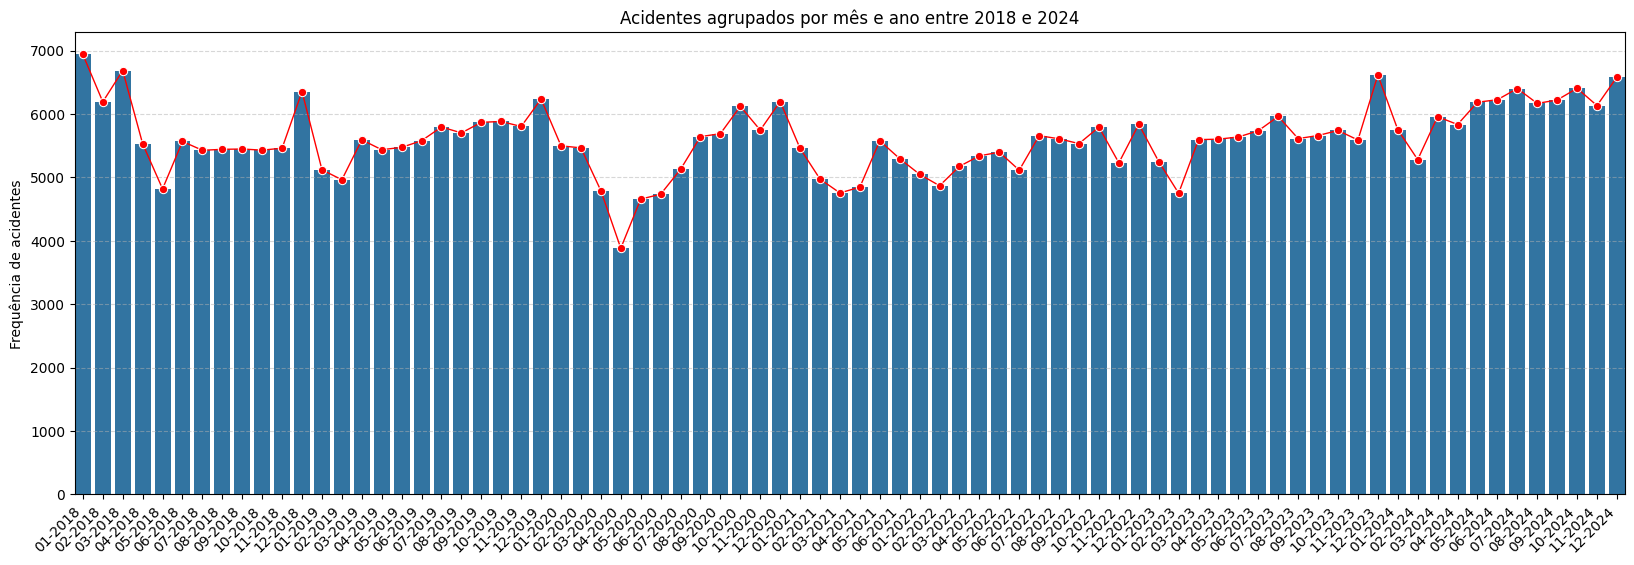

In [ ]:
df_accidents_grouped = df_accidents["mes_ano"].value_counts().sort_index()
df_accidents_grouped.index = df_accidents_grouped.index.strftime("%m-%Y")

generate_barplot(
    enable_lineplot=True,
    x_value=df_accidents_grouped.index.astype(str),
    y_value=df_accidents_grouped.values,
    title="Acidentes agrupados por mês e ano entre 2018 e 2024",
    y_label="Frequência de acidentes",
    file_name="acidentes_por_mes_ano"
)